In this workbook, we compare flavour observables calculated using NMSSMTools v4.5.1 with those calculated using SuperIso v3.4. Unfortunately, NMSSMTools only calculates a handful of flavour physics results. 2 $\sigma$ valid ranges as applied in NMSSMTools are listed in brackets:

- $BR(b \to s \gamma)$ - $[2.99, 3.87]\times 10^{-4}$

- $BR(B_s \to \mu\mu)$ - $[1.2, 5.2]\times 10^{-9}$ - **NEW MAY 2015 LIMIT** $[1.6, 4.2]\times 10^{-9}$ - have stuck with old one in NMSSMTools for now but makes virtually no difference

- $BR(B^+ \to \tau^+ \nu_{\tau})$ - $[0.70, 1.58]\times 10^{-4}$

- $\Delta M_d$ - $[5.04, 5.16]\times 10^{-1}\ \mathrm{ps}^{-1}$ - **_Not calculated by SuperIso_**

- $\Delta M_s$ - $[1.7717, 1.7805]\times 10^{1}\ \mathrm{ps}^{-1}$ - **_Not calculated by SuperIso_**

- $\Delta a_{\mu}$ - $[0.8773, 4.611]\times 10^{-9}$

whereas SuperIso calculates a much larger range of observables. Thus, we will only compare those 4 common observables listed above. One could also add in additional experimental constraints based on the extra observables SuperIso calculates, this is on the TODO list, although will takes some time to find references for all the experimental measurements.


For the plots below, the following parameter space was scanned:

- $500 < M3 < 2000 $ GeV 

- $500 < MU3, MQ3 < 2500$ GeV

- $500 < AU3 < 3000$ GeV

- $M1$ = 150 GeV, $M2$ = 300 GeV

- $MD3$ = 1 TeV

- $AD3$ = 2.5 TeV

- $\tan \beta \in [1.5, 50]$

- $\mu_{eff} \in [100, 300]\ \mathrm{GeV}$

- $\kappa,\lambda \in [0, 0.7]$

- $A_{\kappa} \in [-30, 2.5]\ \mathrm{GeV}$

- $A_{\lambda} \in [-1000, 4000]\ \mathrm{GeV}$

Note also that:

- All constraints checked against except the LHC ones, and in addition we require 1) $\Delta a_{\mu} > 0$ and 2) $\Omega h^2 < 0.131$

- Plots that are labelled 'without experimental constraints' have points that are only required to pass: 
    - $m_h^2 > 1$
    - $m_a^2 >1$
    - $m_{H^\pm}^2 >1$
    - $m_{a_1} < 100\ \mathrm{GeV}$
    

On a practical note, some notes about running with SuperIso:

- Easy to compile and run, pass the SLHA `spectr*.dat` output file from NMSSMTools to the SuperIso SLHA program:

```
make slha
./slha.x spectr1.dat
```

- SuperIso outputs a SLHA file and also outputs info to STDOUT. Unfortunately you can't set the SLHA filename, and doesn't include the relic density as calculated by SuperIso.

- Since SuperIso requires the output SLHA from NMSSMTools, it is not possible to run SuperIso and NMSSMTools in parallel. This can slow generation & analysis significantly e.g it takes approx. 45 min to generate 10K points with NMSSMTools, and just over 1 hour to run over them with SuperIso, thereby doubling total time.

**Conclusion**: for the processes considered ($b\to s\gamma$, $B_s\to\mu\mu$, $\Delta a_{\mu}$), using SuperIso instead of NMSSMTools would have very little effect when considering the number of points passing or failing those constraints.

**Comment 1**: this was done over the whole range of parameter space scanned, and thus is an average over it. One could also investigate particular areas of parameter space, e.g. low mass $a_1$. I repeated the point-by-point difference plots for $m_{a_1} < 10.5$ GeV, and the conclusions were identical.

**Comment 2**: all the point-by-point distributions shown below have some points at extremely large differences. Whilst they are negligible in the overall total, they show that it **is** possible to get radically different values out of the two programs. This could be investigated. Or it may just be points in parameter space that cause problems with the numerical methods, or are excluded by other constraints.

**Comment 3**: I have not investigated if applying other experimental constraints affects the distributions. One could imagine that by requiring a particualr set of experimental cosntraints to be passed, one would be forced into a particular region of phase space, thereby invalidating the conclusions (see Comment 1).

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from itertools import izip

# to show plots:
get_ipython().magic(u'pylab inline')

get_ipython().magic(u'load_ext autoreload')
get_ipython().magic(u'autoreload 2')

%config InlineBackend.figure_formats = 'png',

mpl.rcParams['figure.figsize'] = (7.0, 4.0)  # default size of plots
mpl.rcParams['axes.labelsize'] = 30
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20
mpl.rcParams['xtick.major.size'] = 10
mpl.rcParams['ytick.major.size'] = 10
mpl.rcParams['xtick.minor.size'] = 5
mpl.rcParams['ytick.minor.size'] = 5
mpl.rcParams['legend.framealpha'] = 0.6
mpl.rcParams.update({'font.size': 24, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

Populating the interactive namespace from numpy and matplotlib


In [2]:
from common_plots import *

In [3]:
# Unpack dataframes from hdf5 binaries
# I4 = 1 dataset, scanning over M3,MU3,MQ3,AU3 
store_M3MU3MQ3AU3_scan = pd.HDFStore("points_I41_scan_M3MQ3MU3AU3.h5")
# store_M3MU3MQ3AU3_scan
df_M3MU3MQ3AU3_orig = store_M3MU3MQ3AU3_scan.full12loop_all
df_M3MU3MQ3AU3_pass_all = store_M3MU3MQ3AU3_scan.full12loop_good_posMuMagMom_planckUpperOnly
# df_M3MU3MQ3AU3_ma1Lt10 = store_M3MU3MQ3AU3_scan.full12loop_good_posMuMagMom_planckUpperOnly_maLt10
df_M3MU3MQ3AU3_h1SM = store_M3MU3MQ3AU3_scan.full12loop_good_posMuMagMom_planckUpperOnly_h1SM
# df_M3MU3MQ3AU3_h2SM = store_M3MU3MQ3AU3_scan.full12loop_good_posMuMagMom_planckUpperOnly_h2SM
store_M3MU3MQ3AU3_scan.close()

In [4]:
print 'Without exp. constraints:', len(df_M3MU3MQ3AU3_orig.index), ', with exp. constraints:', len(df_M3MU3MQ3AU3_pass_all.index)

Without exp. constraints: 315956 , with exp. constraints: 20404


In [5]:
def calc_num_could_pass(df, var1, var2, limits):
    """
    Calculate number of events in df that fail limits when considering variable var1, 
    but would pass using variable name var2.
    
    Returns a tuple of (num. now inside lower limit, num. now inside upper limit)
    
    limits is a list, [0] = lower limit, [1] = upper limit
    """
    # number that fall below or above limit
    below = df[df[var1] < limits[0]]
    above = df[df[var1] > limits[1]]

    # now calculate subset of those that are now inside limits using var2
    below_pass = below[below[var2] > limits[0]]
    above_pass = above[above[var2] < limits[1]]
    
    return len(below_pass.index), len(above_pass.index)

#$BR(b\to s\gamma)$

In [55]:
# central experimental value +- 2 sigma
bsgamma_lim = [2.99E-4, 3.87E-4]

Summary of the BRs, comparing NMSSMTools (`bsgamma`) and SuperIso (`bsgamma_si`) without experimental constraints:

In [27]:
df_M3MU3MQ3AU3_orig.loc[:, ['bsgamma', 'bsgamma_si']].describe(percentiles=[.05, .25, .75, .95])

,bsgamma,bsgamma_si
count,315956.000000,315956.000000
mean,0.000375,0.000387
std,0.000126,0.000157
min,0.000316,0.000315
5%,0.000323,0.000323
25%,0.000332,0.000334
50%,0.000346,0.000351
75%,0.000378,0.000389
95%,0.000507,0.000545
max,0.012973,0.016820


First we plot the distributions of each value:

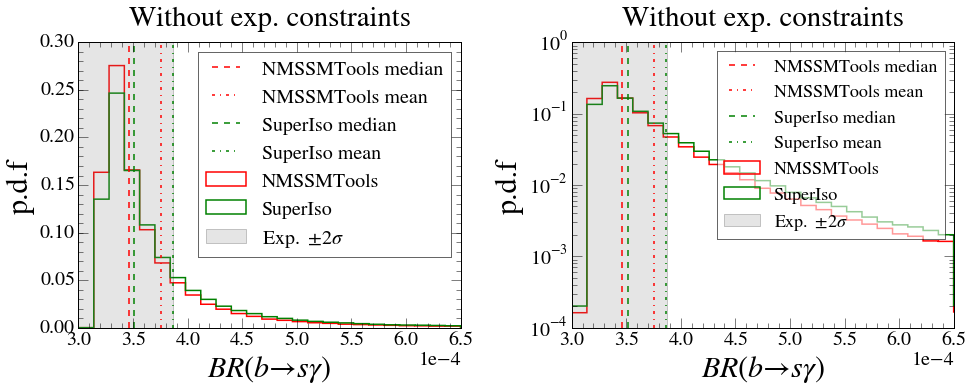

In [228]:
fig = plt.figure()
fig.set_size_inches(14,6)
title = r"Without exp. constraints"
xlabel = r"$BR(b\to s \gamma)$"
bins = 25
br_range = [3E-4, 6.5E-4]

# Lin y axis
ax1 = fig.add_subplot(1,2,1)
y11, bins11, patches11 = plot_histogram(ax1, var='bsgamma', df=df_M3MU3MQ3AU3_orig, label="NMSSMTools", 
                                     xlabel=xlabel, ylabel="p.d.f", title=title, errorbars=False, normed=True, 
                                     color='red', range=br_range, bins=bins, histtype="step", linewidth=1.5)
add_median_line(df=df_M3MU3MQ3AU3_orig, var='bsgamma', c='red', ls='--', lw=1.5, label='NMSSMTools median')
add_mean_line(df=df_M3MU3MQ3AU3_orig, var='bsgamma', c='red', ls='-.', lw=1.5, label='NMSSMTools mean')
y21, bins21, patches21 = plot_histogram(ax1, var='bsgamma_si', df=df_M3MU3MQ3AU3_orig, label="SuperIso", 
                                     xlabel=xlabel, ylabel="p.d.f", title=title, errorbars=False, normed=True, 
                                     color='green', range=br_range, bins=bins, histtype="step", linewidth=1.5)
add_median_line(df_M3MU3MQ3AU3_orig, 'bsgamma_si', c='green', ls='--', lw=1.5, label='SuperIso median')
add_mean_line(df_M3MU3MQ3AU3_orig, 'bsgamma_si', c='green', ls='-.', lw=1.5, label='SuperIso mean')
# exp. constraint region
make_highlight_region(ax=ax1, limits=bsgamma_lim, axis='x', 
                               label=r"Exp. $\pm 2\sigma$", alpha=0.2, facecolor='grey')
ax1.set_xlim(br_range)
ax1.legend(fontsize=20)
ax1.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

# log y axis
ax2 = fig.add_subplot(1,2,2)
y12, bins12, patches12 = plot_histogram(ax2, var='bsgamma', df=df_M3MU3MQ3AU3_orig, label="NMSSMTools", 
                                     xlabel=xlabel, ylabel="p.d.f", title=title, errorbars=False, normed=True, 
                                     color='red', range=br_range, bins=bins, histtype="step", linewidth=1.5, log=True)
add_median_line(df=df_M3MU3MQ3AU3_orig, var='bsgamma', c='red', ls='--', lw=1.5, label='NMSSMTools median')
add_mean_line(df=df_M3MU3MQ3AU3_orig, var='bsgamma', c='red', ls='-.', lw=1.5, label='NMSSMTools mean')
y22, bins22, patches22 = plot_histogram(ax2, var='bsgamma_si', df=df_M3MU3MQ3AU3_orig, label="SuperIso", 
                                     xlabel=xlabel, ylabel="p.d.f", title=title, errorbars=False, normed=True, 
                                     color='green', range=br_range, bins=bins, histtype="step", linewidth=1.5, log=True)
add_median_line(df_M3MU3MQ3AU3_orig, 'bsgamma_si', c='green', ls='--', lw=1.5, label='SuperIso median')
add_mean_line(df_M3MU3MQ3AU3_orig, 'bsgamma_si', c='green', ls='-.', lw=1.5, label='SuperIso mean')
# exp. constraint region
make_highlight_region(ax=ax2, limits=bsgamma_lim, axis='x', 
                               label=r"Exp. $\pm 2\sigma$", alpha=0.2, facecolor='grey')
ax2.set_xlim(br_range)
ax2.set_ylim(bottom=1E-4)
ax2.legend(fontsize=18)
ax2.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
fig.tight_layout()

So we can see that in general NMSSMTools tends to provide slightly smaller values of BR than SuperIso. On the whole, the difference is fairly small, i.e. $\langle {BR}_{\mathrm{NMSSMTools}}\rangle - \langle {BR}_{\mathrm{SuperIso}}\rangle \ll \langle {BR}_{NMSSMTools}\rangle$ (difference in means is about 3%, difference in medians is about 1.5%)

We can also look at the difference on a point-by-point basis, i.e. for each parameter point calculate BR using both NMSSMTools and SuperIso, and compare:

In [28]:
# Make new series with diff between NMSSMTools and SuperIso without exp. con
bsgamma_without = df_M3MU3MQ3AU3_orig.bsgamma.copy(deep=True)
bsgamma_si_without = df_M3MU3MQ3AU3_orig.bsgamma_si
bsgamma_without = bsgamma_without.subtract(bsgamma_si_without)
bsgamma_without.describe(percentiles=[.05, .25, .75, .95])

count    3.159560e+05
mean    -1.127232e-05
std      3.382498e-05
min     -6.598164e-03
5%      -3.911520e-05
25%     -1.093957e-05
50%     -4.810607e-06
75%     -2.034783e-06
95%     -1.461860e-07
max      1.392085e-04
Name: bsgamma, dtype: float64

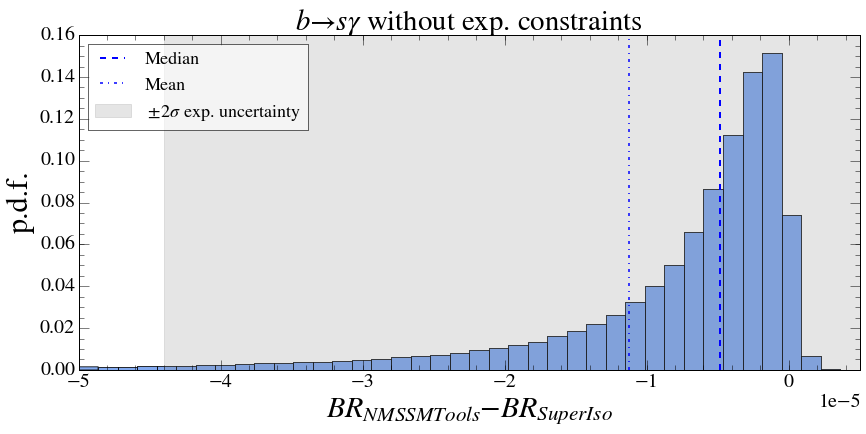

In [207]:
fig = plt.figure()
fig.set_size_inches(14,6)

title = r"$b \to s \gamma$ without exp. constraints"
br_range = [-0.5E-4, 5E-6]

bsgamma_val = bsgamma_without.values
weights = np.ones_like(bsgamma_val)/len(bsgamma_val)
y, bins, patches = plt.hist(bsgamma_val, weights=weights, bins=40, 
                            range=br_range, log=False, color='cornflowerblue', alpha=0.8)
ax = plt.gca()
add_median_line(array=bsgamma_val, c='blue', lw=2, ls='--', label="Median")
add_mean_line(array=bsgamma_val, c='blue', lw=1.5, ls='-.', label="Mean")
make_highlight_region(ax, [bsgamma_lim[0]-(0.5*sum(bsgamma_lim)), bsgamma_lim[1]-(0.5*sum(bsgamma_lim))], 
                      'x', color='gray', alpha=0.2, label=r"$\pm 2 \sigma$ exp. uncertainty")
plt.xlabel(r"${BR}_{NMSSMTools} - {BR}_{SuperIso}$")
plt.ylabel("p.d.f.")
plt.xlim(br_range)
plt.title(title)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.minorticks_on()
plt.legend(loc='best', fontsize=18)

The grey shaded region shows the $\pm 2 \sigma$ uncertainty on the central experimental value about $\Delta BR = 0$. So we can see that even on a point-by-point basis NMSSMTools tends to provide slightly smaller values of BR than SuperIso. The mean difference, $-1.1\times 10^{-5}$, is about 3% of the NMSSMTools mean value (if one takes the median, then that difference is about 1.5% of the NMSSMTools median value). So the difference between NMSSMTools and SuperIso per point is fairly small, i.e. $\langle {BR}_{\mathrm{NMSSMTools}} - {BR}_{\mathrm{SuperIso}}\rangle \ll \langle {BR}_{NMSSMTools}\rangle$. The mean difference is $\sim 0.5 \sigma$, whilst the median difference is $\sim 0.1 \sigma$. Thus the difference on a point-by-point basis is fairly small. 


(Aside: sometimes there are some _very_ large differences)

We can calculate the percentage of points that failed the constraint using the value from NMSSMTools that would instead pass using the value from SuperIso (& vice versa):

In [210]:
below_bsgamma, above_bsgamma = calc_num_could_pass(df_M3MU3MQ3AU3_orig, "bsgamma", "bsgamma_si", bsgamma_lim)
# print below_bsgamma, above_bsgamma
below_bsgamma2, above_bsgamma2 = calc_num_could_pass(df_M3MU3MQ3AU3_orig, "bsgamma_si", "bsgamma", bsgamma_lim)
# print below_bsgamma2, above_bsgamma2
print "%.3f%% more events (without other exp. constraints) would have passed using SuperIso than NMSSMTools" % (100.*(below_bsgamma+above_bsgamma)/len(df_M3MU3MQ3AU3_orig.index))
print "%.3f%% more events (without other exp. constraints) would have passed using NMSSMTools than SuperIso" % (100.*(below_bsgamma2+above_bsgamma2)/len(df_M3MU3MQ3AU3_orig.index))

0.000% more events (without other exp. constraints) would have passed using SuperIso than NMSSMTools
4.537% more events (without other exp. constraints) would have passed using NMSSMTools than SuperIso


Note that using the SuperIso value would not have increased the number of events passing the constraint. **However, this is only the central value, and does not take into account theoretical uncertainties, which can be sizeable.** Including these corrections would reduce the number significantly.

One should note that NMSSMTools tends to assign a large theoretical uncertainty to the BR, $\delta_{theoretical}^{BR}$, such that even if the BR falls above the upper limit (3.87E-4), $BR-\delta_{theoretical}^{BR}$ can easily bring it below the upper limit. This can be seen when we plot the BR with and without the BR constraint (taking the BR from NMSSMTools and ignoring all other experimental constraints), and comparing against the upper limit applied in NMSSMTools (grey band).

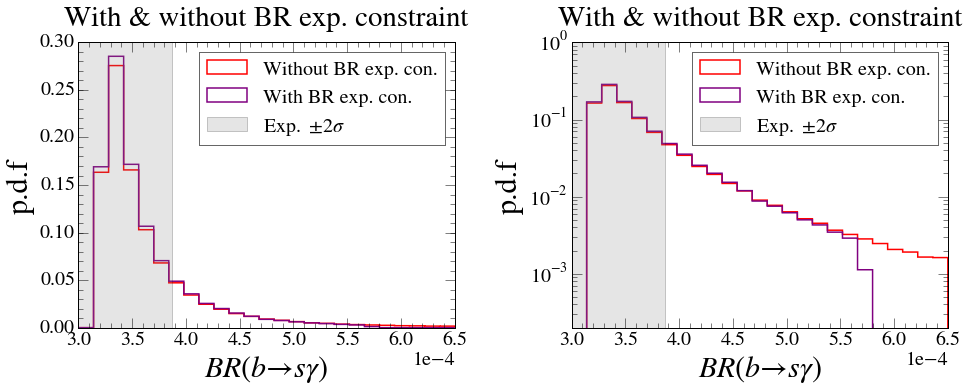

In [57]:
fig = plt.figure()
fig.set_size_inches(14,6)
title = r"With & without BR exp. constraint"
xlabel = r"$BR(b\to s \gamma)$"
bins = 25
br_range = [3E-4, 6.5E-4]

# Subset of points that pass the b->sgamma constraint (ignoring all other constraints)
df_pass_bsgamma = df_M3MU3MQ3AU3_orig[~ df_M3MU3MQ3AU3_orig.constraints.str.contains(r"b \-> s gamma")]
# print df_pass_bsgamma.constraints

# Lin y axis
ax1 = fig.add_subplot(1,2,1)
y11, bins11, patches11 = plot_histogram(ax1, var='bsgamma', df=df_M3MU3MQ3AU3_orig, label="Without BR exp. con.", 
                                     xlabel=xlabel, ylabel="p.d.f", title=title, errorbars=False, normed=True, 
                                     color='red', range=br_range, bins=bins, histtype="step", linewidth=1.5)
y21, bins21, patches21 = plot_histogram(ax1, var='bsgamma', df=df_pass_bsgamma, label="With BR exp. con.", 
                                     xlabel=xlabel, ylabel="p.d.f", title=title, errorbars=False, normed=True, 
                                     color='purple', range=br_range, bins=bins, histtype="step", linewidth=1.5)
make_highlight_region(ax=ax1, limits=bsgamma_lim, axis='x', 
                               label=r"Exp. $\pm 2\sigma$", alpha=0.2, facecolor='grey')
ax1.set_xlim(br_range)
ax1.legend(fontsize=20)
ax1.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

# log y axis
ax2 = fig.add_subplot(1,2,2)
y12, bins12, patches12 = plot_histogram(ax2, var='bsgamma', df=df_M3MU3MQ3AU3_orig, label="Without BR exp. con.", 
                                     xlabel=xlabel, ylabel="p.d.f", title=title, errorbars=False, normed=True, 
                                     color='red', range=br_range, bins=bins, histtype="step", linewidth=1.5, log=True)
y22, bins22, patches22 = plot_histogram(ax2, var='bsgamma', df=df_pass_bsgamma, label="With BR exp. con.", 
                                     xlabel=xlabel, ylabel="p.d.f", title=title, errorbars=False, normed=True, 
                                     color='purple', range=br_range, bins=bins, histtype="step", linewidth=1.5, log=True)
make_highlight_region(ax=ax2, limits=bsgamma_lim, axis='x', 
                      label=r"Exp. $\pm 2\sigma$", alpha=0.2, facecolor='grey')
ax2.set_xlim(br_range)
ax2.set_ylim(bottom=2E-4)
ax2.legend(fontsize=20)
ax2.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
fig.tight_layout()

Thus, the theoretical uncertainty is as large as (5.776 - 3.87)E-4 = 1.9E-4 (compare it with the $\pm 2 \sigma$ band size, $0.44\times 10^{-4}$). Therefore, the actual inclusion band is dominated by the theoreical uncertainty, and the number of points that would have have passed instead of failed (or vice versa) is much smaller. If we assume that we can extend the inclusion band by the difference between the point with the largest BR passing the constraint and the upper limit on the exp. constraint, then the count is:

In [58]:
print "Now including maximum theoretical uncertainty:"
theory = max(df_pass_bsgamma.bsgamma)-bsgamma_lim[1]
print "Maximum theoretical error:", theory
below_bsgamma, above_bsgamma = calc_num_could_pass(df_M3MU3MQ3AU3_orig, "bsgamma", "bsgamma_si", [bsgamma_lim[0]-theory, bsgamma_lim[1]+theory])
# print below_bsgamma, above_bsgamma
below_bsgamma2, above_bsgamma2 = calc_num_could_pass(df_M3MU3MQ3AU3_orig, "bsgamma_si", "bsgamma", [bsgamma_lim[0]-theory, bsgamma_lim[1]+theory])
# print below_bsgamma2, above_bsgamma2
print "%.3f%% more events (without other exp. constraints) would have passed using SuperIso than NMSSMTools" % (100.*(below_bsgamma+above_bsgamma)/len(df_M3MU3MQ3AU3_orig.index))
print "%.3f%% more events (without other exp. constraints) would have passed using NMSSMTools than SuperIso" % (100.*(below_bsgamma2+above_bsgamma2)/len(df_M3MU3MQ3AU3_orig.index))

Now including maximum theoretical uncertainty:
Maximum theoretical error: 0.000190686405
0.000% more events (without other exp. constraints) would have passed using SuperIso than NMSSMTools
1.073% more events (without other exp. constraints) would have passed using NMSSMTools than SuperIso


**Conclusion**: changing to the SuperIso value won't really affect the number of points passing the constraint since any differences, even on a point-by-point basis, are $\ll \delta_{theoretical}^{BR}$ 

#$BR(B_s \to \mu \mu)$

In [54]:
# central experimental value +- 2 sigma
bsmumu_lim = [1.2E-9, 5.2E-9]
bsmumu_lim_new = [1.6E-9, 4.2E-9] # may 2015 combined value http://www.nature.com/nature/journal/vaop/ncurrent/pdf/nature14474.pdf
# SM prediction, ±2 sigma bands
bsmumu_sm_central = 3.66E-9
bsmumu_sm_lim = [3.2E-9 ,4.12E-9]

Summary of the BRs, comparing NMSSMTools (`bsmumu`) and SuperIso (`bsmumu_si`) without experimental constraints:

In [29]:
df_M3MU3MQ3AU3_orig.loc[:, ['bsmumu', 'bsmumu_si']].describe(percentiles=[.05, .25, .75, .95])

,bsmumu,bsmumu_si
count,3.159560e+05,3.159560e+05
mean,1.487483e-08,7.632685e-02
std,2.975585e-06,2.362356e+01
min,1.432474e-13,6.160000e-11
5%,2.947947e-09,2.584000e-09
25%,2.975214e-09,2.911000e-09
50%,2.982133e-09,2.998000e-09
75%,3.005656e-09,3.048000e-09
95%,3.187654e-09,3.090000e-09
max,1.535302e-03,1.165000e+04


We should look at the median, rather than the mean here, since some **very** large values of BR completely distort the mean.

First we plot the distributions of each value:

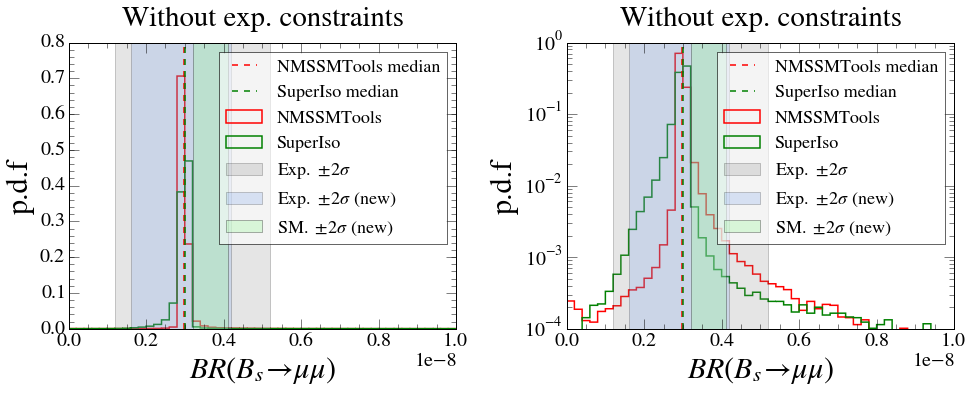

In [231]:
fig = plt.figure()
fig.set_size_inches(14,6)
title = r"Without exp. constraints"
xlabel = r"$BR(B_s\to \mu\mu)$"
bins = 50
br_range = [0, 10E-9]

# Lin y axis
ax1 = fig.add_subplot(1,2,1)
y11, bins11, patches11 = plot_histogram(ax1, var='bsmumu', df=df_M3MU3MQ3AU3_orig, label="NMSSMTools", 
                                     xlabel=xlabel, ylabel="p.d.f", title=title, errorbars=False, normed=True, 
                                     color='red', range=br_range, bins=bins, histtype="step", linewidth=1.5)
y21, bins21, patches21 = plot_histogram(ax1, var='bsmumu_si', df=df_M3MU3MQ3AU3_orig, label="SuperIso", 
                                     xlabel=xlabel, ylabel="p.d.f", title=title, errorbars=False, normed=True, 
                                     color='green', range=br_range, bins=bins, histtype="step", linewidth=1.5)
add_median_line(df=df_M3MU3MQ3AU3_orig, var='bsmumu', c='red', ls='--', lw=1.5, label='NMSSMTools median')
add_median_line(df=df_M3MU3MQ3AU3_orig, var='bsmumu_si', c='green', ls='--', lw=1.5, label='SuperIso median')
make_highlight_region(ax=ax1, limits=bsmumu_lim, axis='x', 
                               label=r"Exp. $\pm 2\sigma$", alpha=0.2, facecolor='grey')
# new limit from 14/5!
make_highlight_region(ax=ax1, limits=bsmumu_lim_new, axis='x', 
                               label=r"Exp. $\pm 2\sigma$ (new)", alpha=0.2, facecolor='cornflowerblue')
# SM range
make_highlight_region(ax=ax1, limits=bsmumu_sm_lim, axis='x', 
                               label=r"SM. $\pm 2\sigma$ (new)", alpha=0.3, facecolor='palegreen')
ax1.set_xlim(br_range)
ax1.legend(fontsize=18)
ax1.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

# log y axis
ax2 = fig.add_subplot(1,2,2)
y12, bins12, patches12 = plot_histogram(ax2, var='bsmumu', df=df_M3MU3MQ3AU3_orig, label="NMSSMTools", 
                                     xlabel=xlabel, ylabel="p.d.f", title=title, errorbars=False, normed=True, 
                                     color='red', range=br_range, bins=bins, histtype="step", linewidth=1.5, log=True)
y22, bins22, patches22 = plot_histogram(ax2, var='bsmumu_si', df=df_M3MU3MQ3AU3_orig, label="SuperIso", 
                                     xlabel=xlabel, ylabel="p.d.f", title=title, errorbars=False, normed=True, 
                                     color='green', range=br_range, bins=bins, histtype="step", linewidth=1.5, log=True)
add_median_line(df=df_M3MU3MQ3AU3_orig, var='bsmumu', c='red', ls='--', lw=1.5, label='NMSSMTools median')
add_median_line(df=df_M3MU3MQ3AU3_orig, var='bsmumu_si', c='green', ls='--', lw=1.5, label='SuperIso median')

make_highlight_region(ax=ax2, limits=bsmumu_lim, axis='x', 
                               label=r"Exp. $\pm 2\sigma$", alpha=0.2, facecolor='grey')
# new limit
make_highlight_region(ax=ax2, limits=bsmumu_lim_new, axis='x', 
                               label=r"Exp. $\pm 2\sigma$ (new)", alpha=0.2, facecolor='cornflowerblue')
# SM range
make_highlight_region(ax=ax2, limits=bsmumu_sm_lim, axis='x', 
                               label=r"SM. $\pm 2\sigma$ (new)", alpha=0.3, facecolor='palegreen')
ax2.set_xlim(br_range)
ax2.set_ylim(bottom=1E-4)
ax2.legend(fontsize=18)
ax2.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
fig.tight_layout()

(I also put on the SM range, out of curiosity, using the value in the new May 2015 paper). On the whole, NMSSMTools gives slightly larger values of the BR than SuperIso, with the NMSSMTools distribution skewed towards larger BR and the SuperIso distribution skewed towards smaller values, and the peaks in the same bin. The slight difference makes almost no difference when comparing against the experimental constraint. Interestingly, the most common scenario (*before* experimental constraints applied) is for a BR slightly lower than that predicted in the SM.

Let's look at the distributions on a point-by-point basis like before:

In [30]:
# Make new series with diff between NMSSMTools and SuperIso without exp. con
bsmumu_without = df_M3MU3MQ3AU3_orig.bsmumu.copy(deep=True)
bsmumu_si_without = df_M3MU3MQ3AU3_orig.bsmumu_si
bsmumu_without = bsmumu_without.subtract(bsmumu_si_without)
bsmumu_without.describe(percentiles=[.05, .25, .75, .95])

count    3.159560e+05
mean    -7.632684e-02
std      2.362356e+01
min     -1.165000e+04
5%      -1.156532e-10
25%     -7.051829e-11
50%     -1.550343e-11
75%      9.026141e-11
95%      5.596329e-10
max      1.434002e-03
Name: bsmumu, dtype: float64

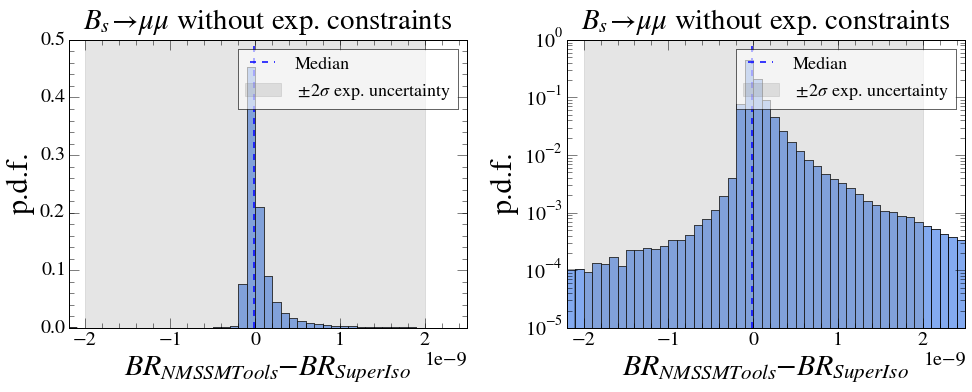

In [206]:
fig = plt.figure()
fig.set_size_inches(14,6)

# lin y axis
ax2 = fig.add_subplot(1,2,1)
title = r"$B_s \to \mu\mu$ without exp. constraints"
br_range = [-2.2E-9, 2.5E-9]

bsmumu_val = bsmumu_without.values
weights = np.ones_like(bsmumu_val)/len(bsmumu_val)
y, bins, patches = ax2.hist(bsmumu_val, weights=weights, bins=47, 
                            range=br_range, log=False, color='cornflowerblue', alpha=0.8)
make_highlight_region(ax2, [bsmumu_lim[0]-(0.5*sum(bsmumu_lim)), bsmumu_lim[1]-(0.5*sum(bsmumu_lim))], 
                      'x', color='gray', alpha=0.2, label=r"$\pm 2 \sigma$ exp. uncertainty")
add_median_line(array=bsmumu_val, c='blue', lw=1.5, ls='--', label='Median')
ax2.set_xlabel(r"${BR}_{NMSSMTools} - {BR}_{SuperIso}$")
ax2.set_ylabel("p.d.f.")
ax2.set_xlim(br_range)
ax2.set_title(title, y=1.02)
ax2.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax2.minorticks_on()
plt.tight_layout()
plt.legend(loc='best', fontsize=18)

# log y axis
ax = fig.add_subplot(1,2,2)
title = r"$B_s \to \mu\mu$ without exp. constraints"
br_range = [-2.2E-9, 2.5E-9]

y, bins, patches = ax.hist(bsmumu_val, weights=weights, bins=47, 
                            range=br_range, log=True, color='cornflowerblue', alpha=0.8)
make_highlight_region(ax, [bsmumu_lim[0]-(0.5*sum(bsmumu_lim)), bsmumu_lim[1]-(0.5*sum(bsmumu_lim))], 
                      'x', color='gray', alpha=0.2, label=r"$\pm 2 \sigma$ exp. uncertainty")
add_median_line(array=bsmumu_val, c='blue', lw=1.5, ls='--', label='Median')
ax.set_xlabel(r"${BR}_{NMSSMTools} - {BR}_{SuperIso}$")
ax.set_ylabel("p.d.f.")
ax.set_xlim(br_range)
ax.set_title(title, y=1.02)
ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax.minorticks_on()
plt.tight_layout()
plt.legend(loc='best', fontsize=18)

The median difference is $-1.55\times 10^{-11}$, which corresponds to 0.8% of the $2\sigma$ range $(2\times10^{-9})$. Thus, the difference is negligible.

We can calculate the percentage of points that failed the constraint using the value from NMSSMTools that would instead pass using the value from SuperIso (& vice versa):

In [211]:
below_bsmumu, above_bsmumu = calc_num_could_pass(df_M3MU3MQ3AU3_orig, "bsmumu", "bsmumu_si", bsgamma_lim)
# print below_bsmumu, above_bsmumu
below_bsmumu2, above_bsmumu2 = calc_num_could_pass(df_M3MU3MQ3AU3_orig, "bsmumu_si", "bsmumu", bsgamma_lim)
# print below_bsmumu2, above_bsmumu2
print "%.3f%% more events (without other exp. constraints) would have passed using SuperIso than NMSSMTools" % (100.*(below_bsmumu+above_bsmumu)/len(df_M3MU3MQ3AU3_orig.index))
print "%.3f%% more events (without other exp. constraints) would have passed using NMSSMTools than SuperIso" % (100.*(below_bsmumu2+above_bsmumu2)/len(df_M3MU3MQ3AU3_orig.index))

0.052% more events (without other exp. constraints) would have passed using SuperIso than NMSSMTools
0.050% more events (without other exp. constraints) would have passed using NMSSMTools than SuperIso


Very small difference between using NMSSMTools and SuperIso, and this doesn't even take into account theoretical uncertainties.

**Conclusion**:

There is no practical difference using the value for $BR(B_s\to\mu\mu)$ as calculated by NMSSMTools or SuperIso.

#$\Delta a_{\mu}$ 

NB: this section is slightly moot, given we ignore the lower bound on $\Delta a_{\mu}$, and there are not points above the upper bound.

In [52]:
# central experimental value +- 2 sigma
del_a_mu_lim = [8.77306222E-10, 4.61144414E-09]

In [31]:
df_M3MU3MQ3AU3_orig.loc[:, ["Del_a_mu", "a_mu_si"]].describe(percentiles=[.05, .25, .75, .95])

,Del_a_mu,a_mu_si
count,3.159560e+05,3.159560e+05
mean,8.583998e-10,9.588317e-10
std,9.502338e-10,8.906313e-10
min,-2.378072e-07,-8.082000e-08
5%,1.766526e-10,2.175000e-10
25%,4.848500e-10,5.429000e-10
50%,8.329799e-10,9.188000e-10
75%,1.245347e-09,1.360000e-09
95%,1.621613e-09,1.757000e-09
max,5.270528e-08,2.438000e-07


First we plot the distributions of each value:

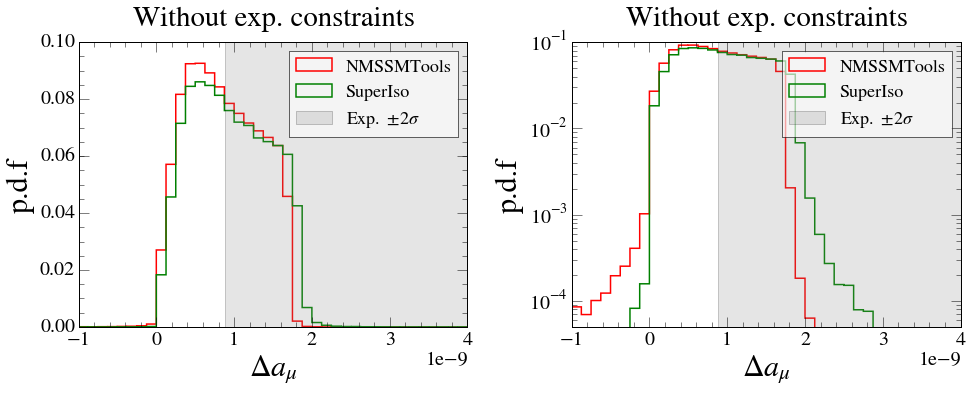

In [232]:
fig = plt.figure()
fig.set_size_inches(14,6)
title = r"Without exp. constraints"
xlabel = r"$\Delta a_{\mu}$"
bins = 40
br_range = [-1E-9, 4E-9]

# Lin y axis
ax1 = fig.add_subplot(1,2,1)
y11, bins11, patches11 = plot_histogram(ax1, var='Del_a_mu', df=df_M3MU3MQ3AU3_orig, label="NMSSMTools", 
                                     xlabel=xlabel, ylabel="p.d.f", title=title, errorbars=False, normed=True, 
                                     color='red', range=br_range, bins=bins, histtype="step", linewidth=1.5)
y21, bins21, patches21 = plot_histogram(ax1, var='a_mu_si', df=df_M3MU3MQ3AU3_orig, label="SuperIso", 
                                     xlabel=xlabel, ylabel="p.d.f", title=title, errorbars=False, normed=True, 
                                     color='green', range=br_range, bins=bins, histtype="step", linewidth=1.5)

make_highlight_region(ax=ax1, limits=del_a_mu_lim, axis='x', 
                               label=r"Exp. $\pm 2\sigma$", alpha=0.2, facecolor='grey')
# SM range
# ax1.add_patch(make_highlight_region(ax=ax1, limits=btaunu_sm_lim, axis='x', 
#                                label=r"SM. $\pm 2\sigma$ (new)", alpha=0.3, facecolor='palegreen'))
ax1.set_xlim(br_range)
ax1.legend(fontsize=18, loc=1)
ax1.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

# log y axis
ax2 = fig.add_subplot(1,2,2)
y12, bins12, patches12 = plot_histogram(ax2, var='Del_a_mu', df=df_M3MU3MQ3AU3_orig, label="NMSSMTools", 
                                     xlabel=xlabel, ylabel="p.d.f", title=title, errorbars=False, normed=True, 
                                     color='red', range=br_range, bins=bins, histtype="step", linewidth=1.5, log=True)
y22, bins22, patches22 = plot_histogram(ax2, var='a_mu_si', df=df_M3MU3MQ3AU3_orig, label="SuperIso", 
                                     xlabel=xlabel, ylabel="p.d.f", title=title, errorbars=False, normed=True, 
                                     color='green', range=br_range, bins=bins, histtype="step", linewidth=1.5, log=True)

make_highlight_region(ax=ax2, limits=del_a_mu_lim, axis='x', 
                               label=r"Exp. $\pm 2\sigma$", alpha=0.2, facecolor='grey')
# SM range
# ax2.add_patch(make_highlight_region(ax=ax2, limits=btaunu_sm_lim, axis='x', 
#                                label=r"SM. $\pm 2\sigma$ (new)", alpha=0.3, facecolor='palegreen'))
ax2.set_xlim(br_range)
ax2.set_ylim(bottom=5E-5)
ax2.legend(fontsize=18, loc=1)
ax2.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
fig.tight_layout()

It appears that SuperIso tends to gives larger values of $\Delta a_{\mu}$. 

(*Aside*: note that we also never get close to the upper limit on $\Delta a_{\mu}$.)

Let's look at the distributions on a point-by-point basis like before:

In [32]:
# Make new series with diff between NMSSMTools and SuperIso without exp. con
del_a_mu_without = df_M3MU3MQ3AU3_orig.Del_a_mu.copy(deep=True)
del_a_mu_si_without = df_M3MU3MQ3AU3_orig.a_mu_si
del_a_mu_without = del_a_mu_without.subtract(del_a_mu_si_without)
del_a_mu_without.describe(percentiles=[.05, .25, .75, .95])

count    3.159560e+05
mean    -1.004319e-10
std      1.238019e-09
min     -3.973995e-07
5%      -1.951087e-10
25%     -1.000670e-10
50%     -6.970975e-11
75%     -4.775667e-11
95%     -2.790979e-11
max      2.914478e-09
Name: Del_a_mu, dtype: float64

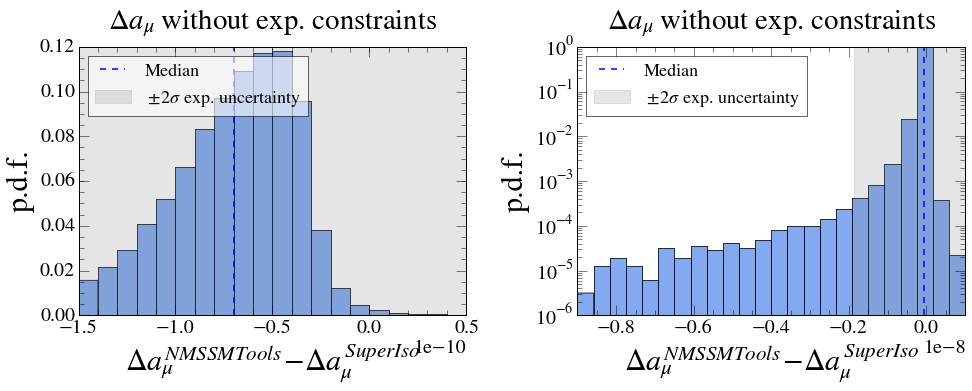

In [219]:
fig = plt.figure()
fig.set_size_inches(14,6)

# lin y axis
ax2 = fig.add_subplot(1,2,1)
title = r"$\Delta a_{\mu}$ without exp. constraints"
br_range = [-1.5E-10, 5E-11]

del_a_mu_val = del_a_mu_without.values
weights = np.ones_like(del_a_mu_val)/len(del_a_mu_val)
y, bins, patches = ax2.hist(del_a_mu_val, weights=weights, bins=20, 
                            range=br_range, log=False, color='cornflowerblue', alpha=0.8)
make_highlight_region(ax2, [del_a_mu_lim[0]-(0.5*sum(del_a_mu_lim)), del_a_mu_lim[1]-(0.5*sum(del_a_mu_lim))], 
                      'x', color='gray', alpha=0.2, label=r"$\pm 2 \sigma$ exp. uncertainty")
add_median_line(array=del_a_mu_val, c='blue', lw=1.5, ls="--", label="Median")
ax2.set_xlabel(r"$\Delta a_{\mu}^{NMSSMTools} - \Delta a_{\mu}^{SuperIso}$")
ax2.set_ylabel("p.d.f.")
ax2.set_xlim(br_range)
ax2.set_title(title, y=1.05)
ax2.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax2.minorticks_on()
plt.tight_layout()
plt.legend(loc=2, fontsize=18)

# log y axis
ax = fig.add_subplot(1,2,2)
br_range = [-9E-9, 1E-9]
y, bins, patches = ax.hist(del_a_mu_val, weights=weights, bins=24, 
                            range=br_range, log=True, color='cornflowerblue', alpha=0.8)
make_highlight_region(ax, [del_a_mu_lim[0]-(0.5*sum(del_a_mu_lim)), del_a_mu_lim[1]-(0.5*sum(del_a_mu_lim))], 
                      'x', color='gray', alpha=0.2, label=r"$\pm 2 \sigma$ exp. uncertainty")
add_median_line(array=del_a_mu_val, c='blue', lw=1.5, ls="--", label="Median")
ax.set_xlabel(r"$\Delta a_{\mu}^{NMSSMTools} - \Delta a_{\mu}^{SuperIso}$")
ax.set_ylabel("p.d.f.")
ax.set_xlim(br_range)
ax.set_title(title, y=1.05)
ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax.minorticks_on()
plt.tight_layout()
plt.legend(loc='best', fontsize=18)

Note the different scales on the x axes. SuperIso tends to give larger values of $\Delta a_{\mu}$, by about $7\times 10^{-11}$, which corresponds to about 2.5% of the central value of $\Delta a_{\mu}$. 

We can calculate the percentage of points that failed the constraint using the value from NMSSMTools that would instead pass using the value from SuperIso (& vice versa):

In [212]:
below_del_a_mu, _ = calc_num_could_pass(df_M3MU3MQ3AU3_orig, "Del_a_mu", "a_mu_si", del_a_mu_lim)
below_del_a_mu2, above_del_a_mu2 = calc_num_could_pass(df_M3MU3MQ3AU3_orig, "a_mu_si", "Del_a_mu", del_a_mu_lim)
print "%.3f%% more events (without other exp. constraints) would have passed using SuperIso than NMSSMTools" % (100.*below_del_a_mu/len(df_M3MU3MQ3AU3_orig.index))
print "%.3f%% more events (without other exp. constraints) would have passed using NMSSMTools than SuperIso" % (100.*(below_del_a_mu2+above_del_a_mu2)/len(df_M3MU3MQ3AU3_orig.index))

5.503% more events (without other exp. constraints) would have passed using SuperIso than NMSSMTools
0.039% more events (without other exp. constraints) would have passed using NMSSMTools than SuperIso


Again, this does not take into account theoretical uncertainties. To show the size of theoretical uncertainties, we can find the smallest $\Delta a_{\mu}$ that still passes the lower bound.

In [53]:
df_M3MU3MQ3AU3_pass_del_a_mu = df_M3MU3MQ3AU3_orig[~df_M3MU3MQ3AU3_orig.constraints.str.contains("Muon magn. mom. more than 2 sigma away")]
print "Smallest del_a_mu passing g-2 constraint:", min(df_M3MU3MQ3AU3_pass_del_a_mu.Del_a_mu)
print "Lower bound on g-2:", del_a_mu_lim[0]
print "Size of theoretical uncertainty:", abs(min(df_M3MU3MQ3AU3_pass_del_a_mu.Del_a_mu) - del_a_mu_lim[0])

Smallest del_a_mu passing g-2 constraint: 5.11686329e-11
Lower bound on g-2: 8.77306222e-10
Size of theoretical uncertainty: 8.261375891e-10


Let us repeat the calculation taking into account this uncertainty:

In [216]:
print "Now including maximum theoretical uncertainty:"
theory = abs(del_a_mu_lim[0] - min(df_M3MU3MQ3AU3_pass_del_a_mu.Del_a_mu))
below_del_a_mu, _ = calc_num_could_pass(df_M3MU3MQ3AU3_orig, "Del_a_mu", "a_mu_si", [del_a_mu_lim[0]-theory, del_a_mu_lim[1]+theory])
below_del_a_mu2, above_del_a_mu2 = calc_num_could_pass(df_M3MU3MQ3AU3_orig, "a_mu_si", "Del_a_mu", [del_a_mu_lim[0]-theory, del_a_mu_lim[1]+theory])
print "%.3f%% more events (without other exp. constraints) would have passed using SuperIso than NMSSMTools" % (100.*below_del_a_mu/len(df_M3MU3MQ3AU3_orig.index))
print "%.3f%% more events (without other exp. constraints) would have passed using NMSSMTools than SuperIso" % (100.*(below_del_a_mu2+above_del_a_mu2)/len(df_M3MU3MQ3AU3_orig.index))

Now including maximum theoretical uncertainty:
0.616% more events (without other exp. constraints) would have passed using SuperIso than NMSSMTools
0.034% more events (without other exp. constraints) would have passed using NMSSMTools than SuperIso


**Conclusion**: We can therefore conlude that, even in the event we apply a lower bound on $\Delta a_{\mu}$, it would make little difference if the value came from NMSSMTools or SuperIso. The difference between them is generally small.

#$B^+ \to \tau^+ \nu_{\tau}$

In [6]:
# central experimental value +- 2 sigma
btaunu_lim = [0.7E-4, 1.58E-4]

Summary of the BRs from NMSSMTools (`btaunu`) and SuperIso (`btaunu_si`) without any experimental constraints.

In [7]:
df_M3MU3MQ3AU3_orig.loc[:, ['btaunu', 'btaunu_si']].describe(percentiles=[.05, .25, .75, .95])

,btaunu,btaunu_si
count,3.159560e+05,3.159560e+05
mean,1.058801e-04,8.007698e-05
std,2.932441e-05,2.249948e-05
min,2.116763e-08,3.125000e-10
5%,1.031309e-04,7.794000e-05
25%,1.061125e-04,8.026000e-05
50%,1.065675e-04,8.061000e-05
75%,1.067789e-04,8.077000e-05
95%,1.069178e-04,8.088000e-05
max,1.642568e-02,1.260000e-02


Notice that the medians are quite different. First plot the distributions from each:

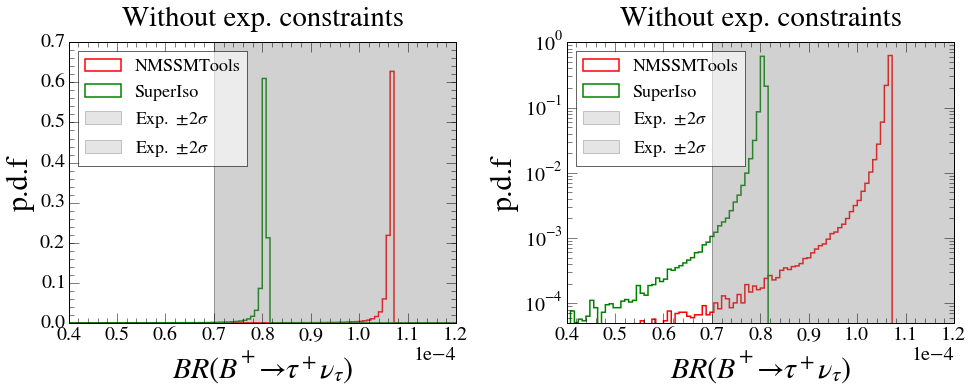

In [8]:
fig = plt.figure()
fig.set_size_inches(14,6)
title = r"Without exp. constraints"
xlabel = r"$BR(B^+\to \tau^+\nu_{\tau})$"
bins = 100
br_range = [0.4E-4, 1.2E-4]

# Lin y axis
ax1 = fig.add_subplot(1,2,1)
y11, bins11, patches11 = plot_histogram(ax1, var='btaunu', df=df_M3MU3MQ3AU3_orig, label="NMSSMTools", 
                                     xlabel=xlabel, ylabel="p.d.f", title=title, errorbars=False, normed=True, 
                                     color='red', range=br_range, bins=bins, histtype="step", linewidth=1.5)
y21, bins21, patches21 = plot_histogram(ax1, var='btaunu_si', df=df_M3MU3MQ3AU3_orig, label="SuperIso", 
                                     xlabel=xlabel, ylabel="p.d.f", title=title, errorbars=False, normed=True, 
                                     color='green', range=br_range, bins=bins, histtype="step", linewidth=1.5)

ax1.add_patch(make_highlight_region(ax=ax1, limits=btaunu_lim, axis='x', 
                               label=r"Exp. $\pm 2\sigma$", alpha=0.2, facecolor='grey'))
ax1.set_xlim(br_range)
ax1.legend(fontsize=18, loc=2)
ax1.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

# log y axis
ax2 = fig.add_subplot(1,2,2)
y12, bins12, patches12 = plot_histogram(ax2, var='btaunu', df=df_M3MU3MQ3AU3_orig, label="NMSSMTools", 
                                     xlabel=xlabel, ylabel="p.d.f", title=title, errorbars=False, normed=True, 
                                     color='red', range=br_range, bins=bins, histtype="step", linewidth=1.5, log=True)
y22, bins22, patches22 = plot_histogram(ax2, var='btaunu_si', df=df_M3MU3MQ3AU3_orig, label="SuperIso", 
                                     xlabel=xlabel, ylabel="p.d.f", title=title, errorbars=False, normed=True, 
                                     color='green', range=br_range, bins=bins, histtype="step", linewidth=1.5, log=True)

ax2.add_patch(make_highlight_region(ax=ax2, limits=btaunu_lim, axis='x', 
                               label=r"Exp. $\pm 2\sigma$", alpha=0.2, facecolor='grey'))
ax2.set_xlim(br_range)
ax2.set_ylim(bottom=5E-5)
ax2.legend(fontsize=18, loc=2)
ax2.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
fig.tight_layout()

The distributions have the same shape, but there is a large offset between them. We can see that the lower values from SuperIso tend to fail the constraint more often. To quantify this:

In [9]:
tot = len(df_M3MU3MQ3AU3_orig.index)
print 'Percentage of points failing lower bound: NMSSMTools: %.3f%%  SuperIso: %.3f%%' % (100.0*len(df_M3MU3MQ3AU3_orig[df_M3MU3MQ3AU3_orig.btaunu < btaunu_lim[0]].index)/tot, 100.*len(df_M3MU3MQ3AU3_orig[df_M3MU3MQ3AU3_orig.btaunu_si < btaunu_lim[0]].index)/tot)

Percentage of points failing lower bound: NMSSMTools: 0.219%  SuperIso: 1.016%


Let us look at this on a point-by-point basis, looking at the difference between the values from NMSSMTools and SuperIso for each point:

In [11]:
# Make new series with diff between NMSSMTools and SuperIso without exp. con
btaunu_without = df_M3MU3MQ3AU3_orig.btaunu.copy(deep=True)
btaunu_si_without = df_M3MU3MQ3AU3_orig.btaunu_si
btaunu_without = btaunu_without.subtract(btaunu_si_without)
btaunu_without.describe(percentiles=[.05, .25, .75, .95])

count    315956.000000
mean          0.000026
std           0.000007
min          -0.000013
5%            0.000025
25%           0.000026
50%           0.000026
75%           0.000026
95%           0.000026
max           0.003826
Name: btaunu, dtype: float64

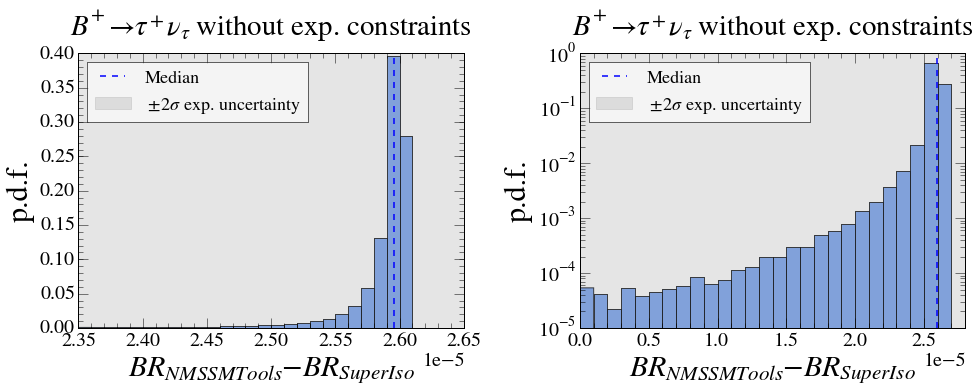

In [48]:
fig = plt.figure()
fig.set_size_inches(14,6)

# lin y axis
ax2 = fig.add_subplot(1,2,1)
title = r"$B^+ \to \tau^+\nu_{\tau}$ without exp. constraints"
br_range = [2.35E-5, 2.65E-5]

btaunu_val = btaunu_without.values
weights = np.ones_like(btaunu_val)/len(btaunu_val)
y, bins, patches = ax2.hist(btaunu_val, weights=weights, bins=30, 
                            range=br_range, log=False, color='cornflowerblue', alpha=0.8)
make_highlight_region(ax2, [btaunu_lim[0]-(0.5*sum(btaunu_lim)), btaunu_lim[1]-(0.5*sum(btaunu_lim))], 
                      'x', color='gray', alpha=0.2, label=r"$\pm 2 \sigma$ exp. uncertainty")
add_median_line(array=btaunu_val, c='blue', lw=1.5, ls="--", label="Median")
ax2.set_xlabel(r"${BR}_{NMSSMTools} - {BR}_{SuperIso}$")
ax2.set_ylabel("p.d.f.")
ax2.set_xlim(br_range)
ax2.set_title(title, y=1.05)
ax2.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax2.minorticks_on()
plt.legend(loc='best', fontsize=18)
plt.tight_layout()

# log y axis
ax = fig.add_subplot(1,2,2)
br_range = [0, 2.8E-5]
y, bins, patches = ax.hist(btaunu_val, weights=weights, bins=28, 
                            range=br_range, log=True, color='cornflowerblue', alpha=0.8)
make_highlight_region(ax, [btaunu_lim[0]-(0.5*sum(btaunu_lim)), btaunu_lim[1]-(0.5*sum(btaunu_lim))], 
                      'x', color='gray', alpha=0.2, label=r"$\pm 2 \sigma$ exp. uncertainty")
add_median_line(array=btaunu_val, c='blue', lw=1.5, ls="--", label="Median")
ax.set_xlabel(r"${BR}_{NMSSMTools} - {BR}_{SuperIso}$")
ax.set_ylabel("p.d.f.")
ax.set_xlim(br_range)
ax.set_title(title, y=1.05)
ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax.minorticks_on()
plt.legend(loc='best', fontsize=18)
plt.tight_layout()

In [24]:
btaunu_mean = btaunu_without.mean()
print "Mean difference: %.3e, and as a percentage of central exp. constraint (%.3e): %.3f%%" %(btaunu_mean, 0.5*sum(btaunu_lim), 100.*(btaunu_mean/(0.5*sum(btaunu_lim))))

Mean difference: 2.580e-05, and as a percentage of central exp. constraint (1.140e-04): 22.634%


There is a **large** difference between the two distributions. The shapes are the same, but there is a overall constant difference. However we can also see that they are both well within the experimental uncertainties. How much difference would it make using the SuperIso value? (ignoring the theoretical uncertainty first)

In [33]:
below_btaunu, _ = calc_num_could_pass(df_M3MU3MQ3AU3_orig, "btaunu", "btaunu_si", btaunu_lim)
below_btaunu2, above_btaunu2 = calc_num_could_pass(df_M3MU3MQ3AU3_orig, "btaunu_si", "btaunu", btaunu_lim)
print "%.3f%% more events (without other exp. constraints) would have passed using SuperIso than NMSSMTools" % (100.*below_btaunu/len(df_M3MU3MQ3AU3_orig.index))
print "%.3f%% more events (without other exp. constraints) would have passed using NMSSMTools than SuperIso" % (100.*(below_btaunu2+above_btaunu2)/len(df_M3MU3MQ3AU3_orig.index))

0.000% more events (without other exp. constraints) would have passed using SuperIso than NMSSMTools
0.798% more events (without other exp. constraints) would have passed using NMSSMTools than SuperIso


We can also estimate the size of the theoretical uncertainty that NMSSMTools assigns to the BR:

In [50]:
df_M3MU3MQ3AU3_pass_btaunu = df_M3MU3MQ3AU3_orig[~df_M3MU3MQ3AU3_orig.constraints.str.contains(r"B\+ \-> tau nu_tau more than 2 sigma away")]
# df_M3MU3MQ3AU3_pass_btaunu.constraints
print "Smallest BR passing BR(B->tau nu) constraint:", min(df_M3MU3MQ3AU3_pass_btaunu.btaunu)
print "Lower bound on BR(B->tau nu):", btaunu_lim[0]
print "Size of theoretical uncertainty:", abs(min(df_M3MU3MQ3AU3_pass_btaunu.btaunu) - btaunu_lim[0])

Smallest BR passing BR(B->tau nu) constraint: 4.12652247e-05
Lower bound on BR(B->tau nu): 7e-05
Size of theoretical uncertainty: 2.87347753e-05


Interestingly, this is about the same size as the median difference between SuperIso and NMSSMTools. Let's repeat the previous estimate but now with the theoretical uncertainty included (assuming we can extend the lower limit by the max theoretical uncertainty)

In [40]:
theory_btaunu = abs(min(df_M3MU3MQ3AU3_pass_btaunu.btaunu) - btaunu_lim[0])
below_btaunu, _ = calc_num_could_pass(df_M3MU3MQ3AU3_orig, "btaunu", "btaunu_si", [btaunu_lim[0]-theory_btaunu, btaunu_lim[1]+theory_btaunu])
below_btaunu2, above_btaunu2 = calc_num_could_pass(df_M3MU3MQ3AU3_orig, "btaunu_si", "btaunu", [btaunu_lim[0]-theory_btaunu, btaunu_lim[1]+theory_btaunu])
print "%.3f%% more events (without other exp. constraints) would have passed using SuperIso than NMSSMTools" % (100.*below_btaunu/len(df_M3MU3MQ3AU3_orig.index))
print "%.3f%% more events (without other exp. constraints) would have passed using NMSSMTools than SuperIso" % (100.*(below_btaunu2+above_btaunu2)/len(df_M3MU3MQ3AU3_orig.index))

0.000% more events (without other exp. constraints) would have passed using SuperIso than NMSSMTools
0.048% more events (without other exp. constraints) would have passed using NMSSMTools than SuperIso


So in the grand scheme of things, it shouldn't make a huge difference. However the large discrepancy between values in general **is** worrying.

Let's look at the *ratio* BR(NMSSMTools):BR(SuperIso) instead between the two programs, on a point-by-point basis:

In [7]:
# Make new series with ratio of NMSSMTools : SuperIso values, wihtout exp. constraints.
btaunu_without2 = df_M3MU3MQ3AU3_orig.btaunu.copy(deep=True)
btaunu_si_without2 = df_M3MU3MQ3AU3_orig.btaunu_si
btaunu_without_ratio = btaunu_without2.divide(btaunu_si_without2)
btaunu_without_ratio.describe(percentiles=[.05, .25, .75, .95])

count    315956.000000
mean          1.323828
std           0.517273
min           0.431512
5%            1.321803
25%           1.321888
50%           1.321963
75%           1.322143
95%           1.323324
max         264.972764
Name: btaunu, dtype: float64

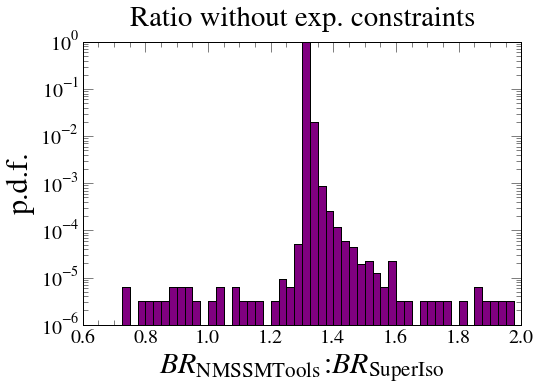

In [63]:
%config InlineBackend.figure_formats = 'pdf', 'png'

fig = plt.figure(1)
fig.set_size_inches(8,6)
ax = fig.add_subplot(1,1,1)
ratio_range = [0.6, 2]
y, bins, patches = plot_histogram(ax, array=btaunu_without_ratio, label="", 
                                  xlabel=r"$BR_{\mathrm{NMSSMTools}}:BR_{\mathrm{SuperIso}}$", ylabel="p.d.f.", 
                                  title="Ratio without exp. constraints", errorbars=False, normed=True, range=ratio_range, 
                                  bins=56, log=True, color='purple')
plt.xlim(ratio_range)
plt.minorticks_on()

Thus there isn't just a simple factor of $2\pi$ missing in one program, although there does seem to be a very common ratio between the points. So it's probably some comon factor, with some point-specific subtle correction.

From http://arxiv.org/pdf/hep-ph/0306037v2.pdf (which NMSSMTools refers to), the higher-order correction term $1/(1+\tilde{\epsilon}_0\tan\beta)$ *can* have a large impact for different $m_{H^{\pm}}$ or large $\tan\beta$. Let's see if this is the case:

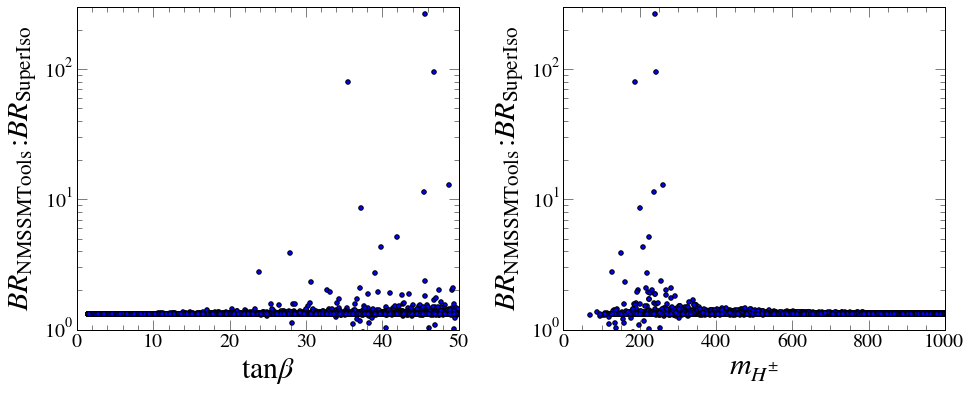

In [30]:
tgbeta_vals = df_M3MU3MQ3AU3_orig.tgbeta.values
mhc_vals = df_M3MU3MQ3AU3_orig.mhc.values
# print len(tgbeta_vals), len(mhc_vals), len(btaunu_without_ratio)

%config InlineBackend.figure_formats = 'png',

fig = plt.figure(1)
fig.set_size_inches(14,6)
ax1 = fig.add_subplot(1,2,1)
plt.scatter(x=tgbeta_vals, y=btaunu_without_ratio)
plt.xlabel(r"$\tan \beta$")
plt.ylabel(r"$BR_{\mathrm{NMSSMTools}}:BR_{\mathrm{SuperIso}}$")
plt.xlim([0,50])
plt.ylim([1,300])
plt.minorticks_on()
plt.yscale('log')
plt.tight_layout()

ax2 = fig.add_subplot(1,2,2)
plt.scatter(x=mhc_vals, y=btaunu_without_ratio)
plt.xlabel(r"$m_{H^{\pm}}$")
plt.ylabel(r"$BR_{\mathrm{NMSSMTools}}:BR_{\mathrm{SuperIso}}$")
plt.xlim([0,1000])
plt.ylim([1,300])
plt.yscale('log')
plt.minorticks_on()
plt.tight_layout()

So the largest differences are at large $\tan(\beta)$ and small $m_{H^{\pm}}$

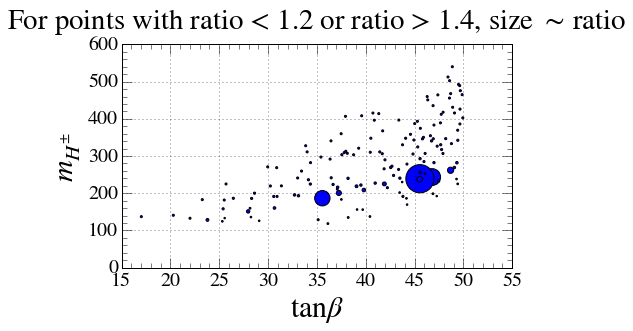

In [64]:
df_temp = pd.DataFrame({'tgbeta':tgbeta_vals, 'mhc': mhc_vals, 'ratio': btaunu_without_ratio})
df_temp2 = df_temp[(df_temp.ratio>1.4) | (df_temp.ratio<1.2)]
df_temp2.plot(kind='scatter', x='tgbeta', y='mhc', s=df_temp2.ratio*3)
plt.xlabel(r"$\tan\beta$")
plt.ylabel(r"$m_{H^{\pm}}$")
plt.title("For points with ratio < 1.2 or ratio > 1.4, size $\sim$ ratio", y=1.05)
# plt.tight_layout()
plt.minorticks_on()

So we can see that points that have a larger difference between the 2 programs are confined to smaller $m_{H^{\pm}}$ and larger $\tan\beta$.